In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso , Ridge
from sklearn.metrics import mean_absolute_error , mean_squared_error 
import numpy as np

In [88]:
dt=pd.read_csv(r"D:\BostonHousing.csv")
dt.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

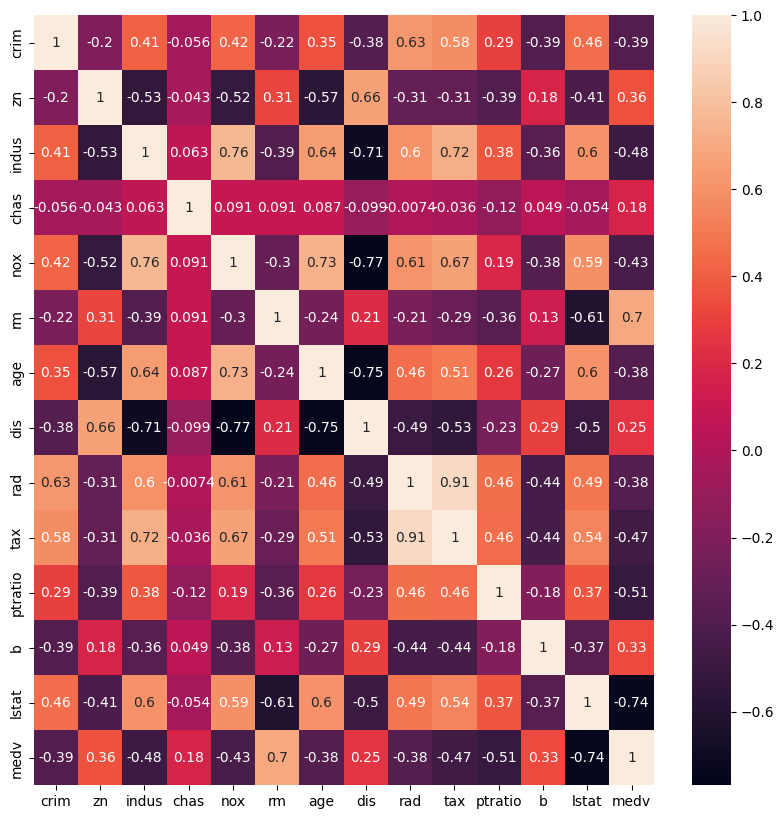

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dt.corr(),annot=True)

In [90]:
X=dt.iloc[:,:-1]
y=dt["medv"]

In [91]:
sc=StandardScaler()
sc.fit(X)
X=pd.DataFrame(sc.transform(X),columns=X.columns)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [93]:
lr = LinearRegression()

In [94]:
lr.fit(X_train, y_train)

LinearRegression()

In [95]:
lr.score(X_test,y_test)*100

66.8759493535632

In [96]:
mean_squared_error(y_test,lr.predict(X_test)), mean_absolute_error(y_test,lr.predict(x_test)), np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))

(24.291119474973517, 3.1890919658878496, np.float64(4.928602182665336))

Text(0.5, 1.0, 'LinearRegression')

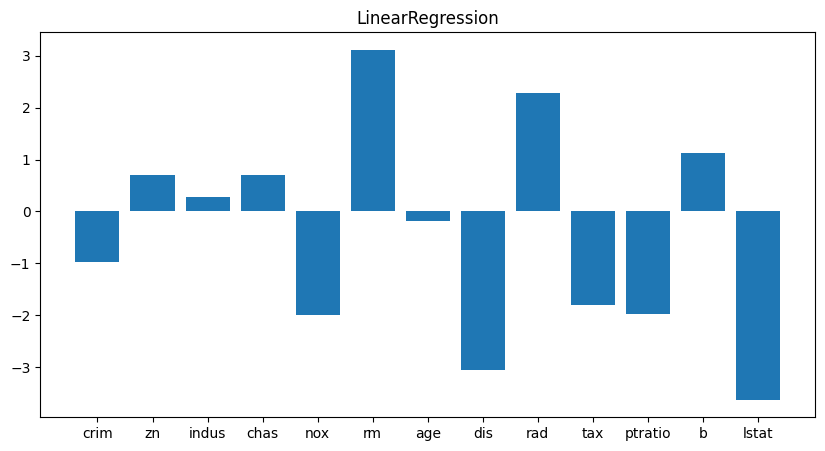

In [97]:
plt.figure(figsize=(10,5))
plt.bar(X.columns, lr.coef_)
plt.title("LinearRegression")

In [98]:
la=Lasso(alpha=1)
la.fit(X_train,y_train)

Lasso(alpha=1)

In [99]:
la.score(X_test,y_test)*100

62.428800383115245

In [100]:
mean_squared_error(y_test,la.predict(x_test)), mean_absolute_error(y_test,la.predict(x_test)), np.sqrt(mean_squared_error(y_test,la.predict(x_test)))

(27.55238205777836, 3.464849520571196, np.float64(5.249036298005412))

Text(0.5, 1.0, "<class 'sklearn.linear_model._coordinate_descent.Lasso'>")

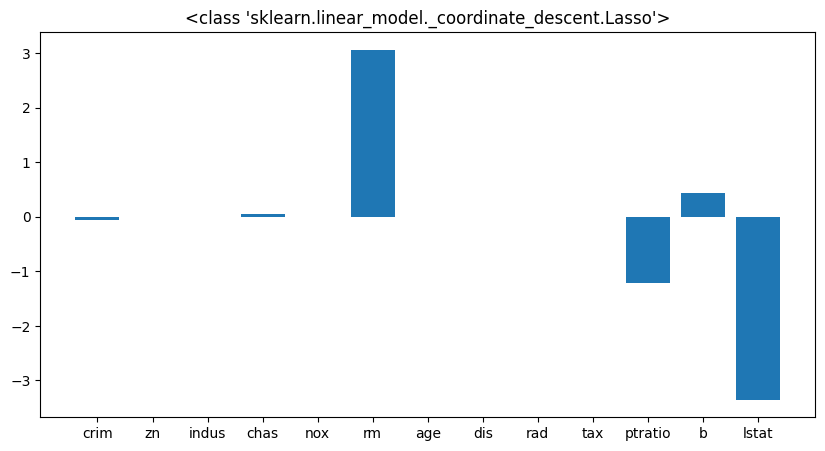

In [101]:
plt.figure(figsize=(10,5))
plt.bar(X.columns,la.coef_)
plt.title(Lasso)

In [102]:
ri=Ridge(alpha=2)
ri.fit(X_train,y_train)

Ridge(alpha=2)

In [103]:
ri.score(X_test,y_test)*100

66.81228294925606

In [104]:
mean_squared_error(y_test,ri.predict(X_test)),mean_absolute_error(y_test,ri.predict(X_test)), np.sqrt(mean_squared_error(y_test,ri.predict(X_test)))

(24.3378084578541, 3.183309675396004, np.float64(4.933336442799548))

Text(0.5, 1.0, 'Ridge')

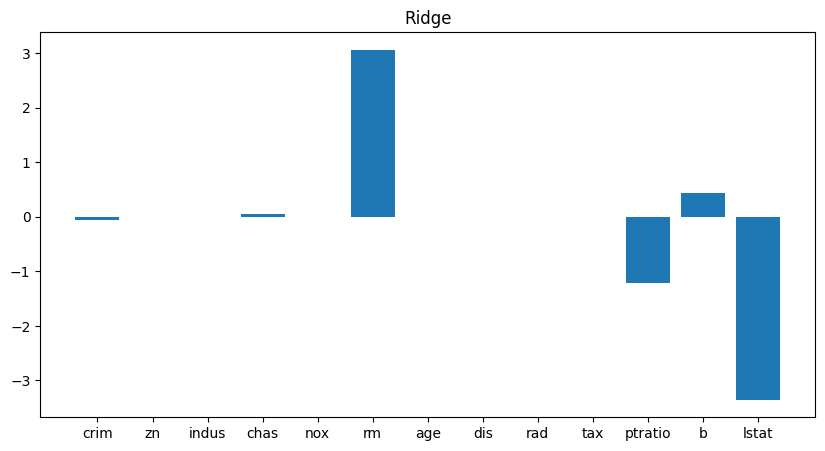

In [105]:
plt.figure(figsize=(10,5))
plt.bar(x.columns, la.coef_)
plt.title("Ridge")